In [1]:
import imbalanced_databases as imbd
import sklearn.datasets as datasets
import imblearn.datasets as imb_datasets

dataset= imb_datasets.fetch_datasets()['wine_quality']

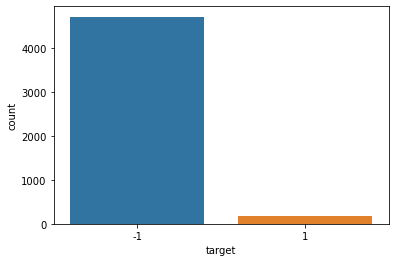

In [2]:
import pandas as pd
import seaborn as sns
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
#a=pd.DataFrame(dataset['data'],columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
b=pd.DataFrame(dataset['target'],columns = ["target"])
a=pd.DataFrame(dataset['data'])
#b=pd.DataFrame(dataset['target'])
df_example = pd.concat([a,b],axis=1)
sns_plot=sns.countplot(df_example["target"])
sns_plot.figure.savefig("WineImbalanced.png")

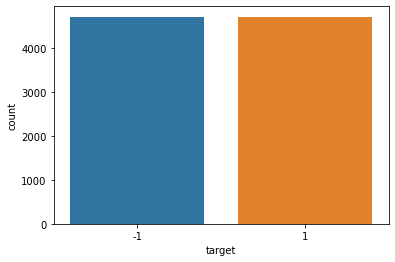

In [3]:
#X, y = smote.fit_resample(a[['A','B','C','D', 'E', 'F', 'G', 'H']], b['I'])
X, y = smote.fit_resample(a[:], b['target'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.concat([X,y],axis=1)
df_oversampler['target']
sns_plot=sns.countplot(df_oversampler['target'])
sns_plot.figure.savefig("WineBalanced.png")

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size = 0.3, stratify = dataset['target'], random_state = 101)

In [5]:
#Create an oversampled training data
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


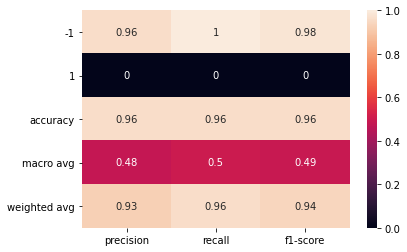

In [6]:
#Training with imbalance data
classifier = LogisticRegression(max_iter=1000)
#classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
clf_report=classification_report(y_test, classifier.predict(X_test),output_dict=True)
sns_plot=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
sns_plot.figure.savefig("WineImAcc.png")

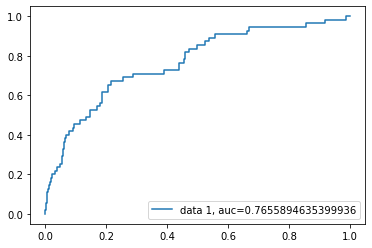

<Figure size 432x288 with 0 Axes>

In [7]:
#y_probas=classifier.predict_proba(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
plt.savefig("WineImAUC.jpg")

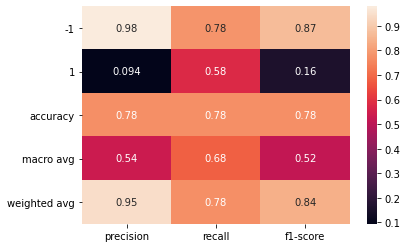

In [8]:
#Training with oversampled data
classifier_o = LogisticRegression(max_iter=1000)
classifier_o.fit(X_oversample, y_oversample)
clf_report=classification_report(y_test, classifier_o.predict(X_test),output_dict=True)
sns_plot=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
sns_plot.figure.savefig("WineBaAcc.png")

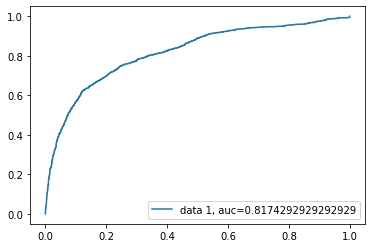

In [9]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = classifier.predict_proba(X_oversample)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_oversample,  y_pred_proba)
auc = metrics.roc_auc_score(y_oversample, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

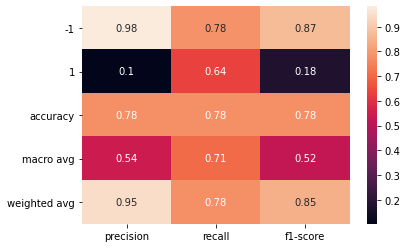

In [10]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = 101)
X_oversample_ada, y_oversample_ada = adasyn.fit_resample(X_train, y_train)
classifier_ada = LogisticRegression(max_iter=1000)
classifier_ada.fit(X_oversample_ada, y_oversample_ada)
clf_report=classification_report(y_test, classifier_ada.predict(X_test),output_dict=True)
sns_plot=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
sns_plot.figure.savefig("WineMoAcc.png")

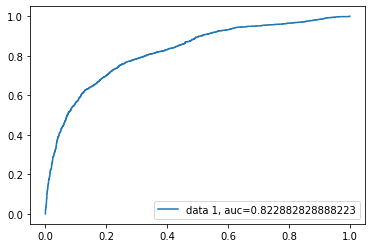

In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = classifier.predict_proba(X_oversample_ada)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_oversample_ada,  y_pred_proba)
auc = metrics.roc_auc_score(y_oversample_ada, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [12]:
import imbalanced_databases as imbd
import sklearn.datasets as datasets
import imblearn.datasets as imb_datasets

dataset= imb_datasets.fetch_datasets()['spectrometer']

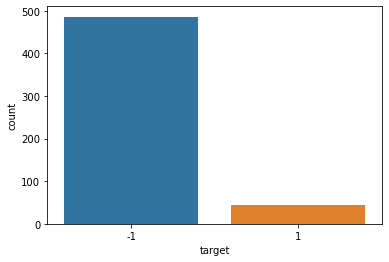

In [13]:
import pandas as pd
import seaborn as sns
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
#a=pd.DataFrame(dataset['data'],columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
b=pd.DataFrame(dataset['target'],columns = ["target"])
a=pd.DataFrame(dataset['data'])
#b=pd.DataFrame(dataset['target'])
df_example = pd.concat([a,b],axis=1)
sns_plot=sns.countplot(df_example["target"])
sns_plot.figure.savefig("SpecImbalanced.png")

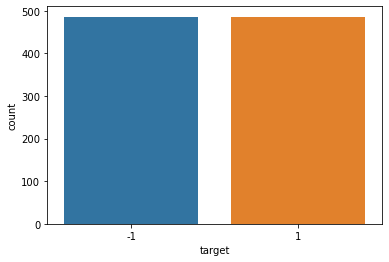

In [14]:
#X, y = smote.fit_resample(a[['A','B','C','D', 'E', 'F', 'G', 'H']], b['I'])
X, y = smote.fit_resample(a[:], b['target'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.concat([X,y],axis=1)
df_oversampler['target']
sns_plot=sns.countplot(df_oversampler['target'])
sns_plot.figure.savefig("SpecBalanced.png")

In [15]:
# Importing the splitter, classification model, and the metric
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size = 0.3, stratify = dataset['target'], random_state = 101)

In [16]:
#Create an oversampled training data
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

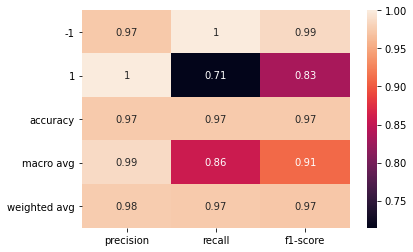

In [17]:
#Training with imbalance data
classifier = LogisticRegression(max_iter=1000)
#classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
clf_report=classification_report(y_test, classifier.predict(X_test),output_dict=True)
sns_plot=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
sns_plot.figure.savefig("SpecImAcc.png")

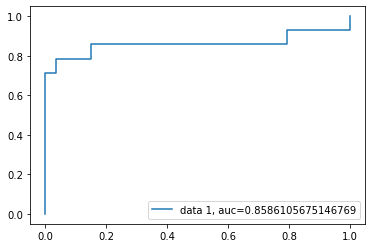

In [18]:
#y_probas=classifier.predict_proba(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

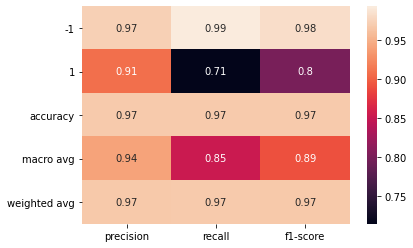

In [19]:
#Training with oversampled data
classifier_o = LogisticRegression(max_iter=1000)
classifier_o.fit(X_oversample, y_oversample)
clf_report=classification_report(y_test, classifier_o.predict(X_test),output_dict=True)
sns_plot=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
sns_plot.figure.savefig("SpecBaAcc.png")

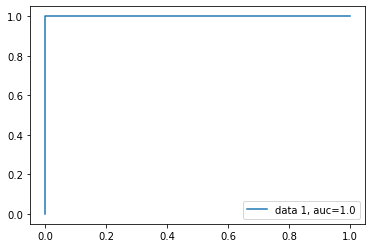

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = classifier.predict_proba(X_oversample)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_oversample,  y_pred_proba)
auc = metrics.roc_auc_score(y_oversample, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

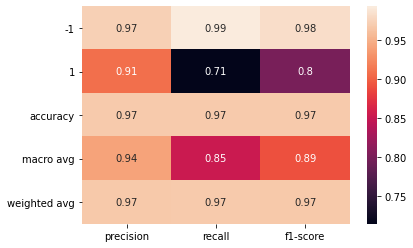

In [21]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = 101)
X_oversample_ada, y_oversample_ada = adasyn.fit_resample(X_train, y_train)
classifier_ada = LogisticRegression(max_iter=1000)
classifier_ada.fit(X_oversample_ada, y_oversample_ada)
clf_report=classification_report(y_test, classifier_ada.predict(X_test),output_dict=True)
sns_plot=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
sns_plot.figure.savefig("SpecMoAcc.png")

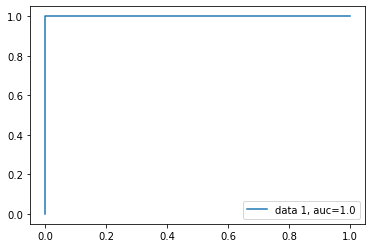

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = classifier.predict_proba(X_oversample_ada)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_oversample_ada,  y_pred_proba)
auc = metrics.roc_auc_score(y_oversample_ada, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()